In [17]:
import numpy as np
import freud

import matplotlib.pyplot as plt
from matplotlib import patches

In [18]:
box = freud.box.Box.from_box([1, 1, 0, 1, 0, 0])

In [19]:
d = box.xy*.5
corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]

In [20]:
points = np.array([[0, -0.05, 0], [0.1, 0.1, 0], [0.15, 0.15, 0], [0.2, 0.2, 0], [0.25, 0.25, 0], [0.3, 0.3, 0], [0.1, 0.3, 0], [0.0, 0.3, 0], [0.08, 0.3, 0], [-0.0, 0.3, 0]])*.5
points[:, :2] -= 0.2

In [21]:
def normal_com(x):
    return np.mean(x[:], axis=0)

(-0.7, 0.7)

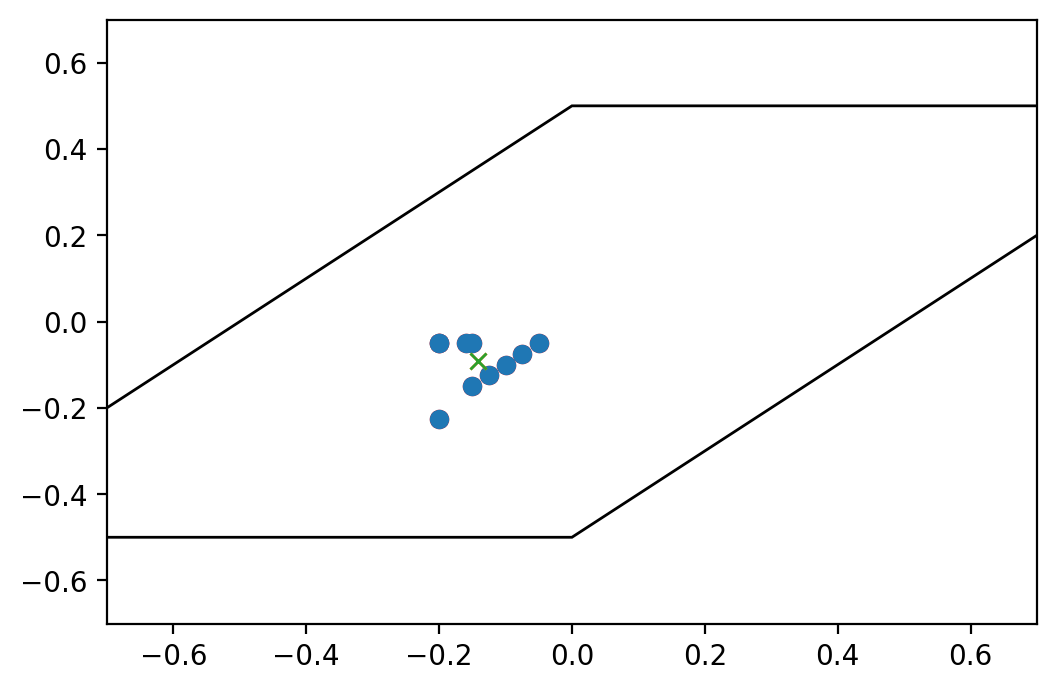

In [22]:
plt.figure(dpi=200)
wrap = box.wrap(points)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(points)
plt.plot(norm_com[0], norm_com[1], 'x')
wrap_com = normal_com(wrap)
plt.plot(wrap_com[0], wrap_com[1], 'x')
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

(-0.1, 1.1)

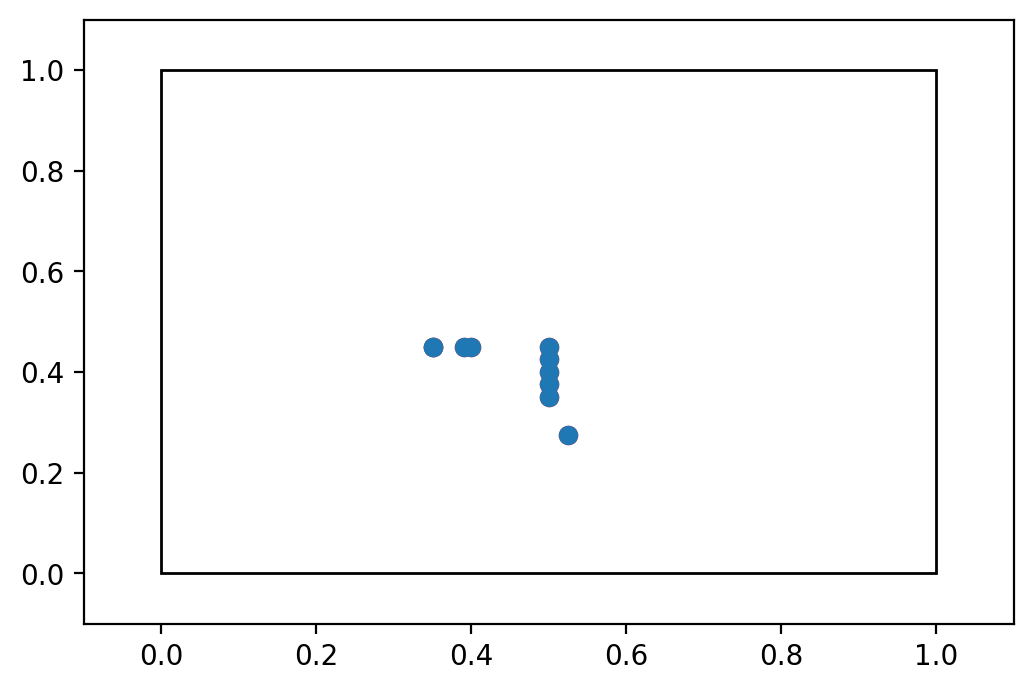

In [23]:
plt.figure(dpi=200)
frac = box.make_fractional(wrap)
plt.plot(frac[:, 0], frac[:, 1], 'o', color="red")

frac = box.make_fractional(points)
plt.plot(frac[:, 0], frac[:, 1], 'o')

box_corners = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [24]:
def le_com(x, nbox):
    box = freud.box.Box.from_box([nbox.Lx, nbox.Ly, 0, 0, 0, 0])
    wrap = box.wrap(nbox.wrap(x))
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)
    meany = box.make_absolute(xcom)
    meany[0] = 0.0
    meany[2] = 0.0
    print(meany)

    nx = x - meany
    wrap = box.wrap(nbox.wrap(nx))
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)
    meanx = box.make_absolute(xcom)[0]
    print(meanx)

    return np.array([meanx, meany[1], 0])

[ 0.         -0.09104273  0.        ]
-0.14133155


(-0.3925, 0.20749999999999996)

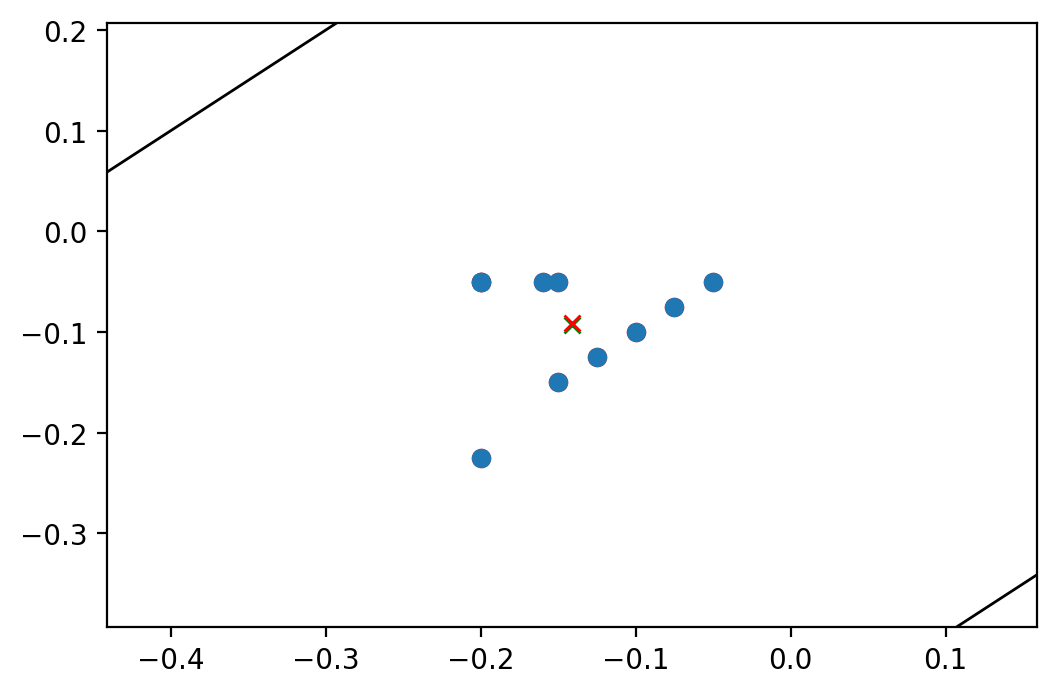

In [25]:
plt.figure(dpi=200)
wrap = box.wrap(points)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(points)
plt.plot(norm_com[0], norm_com[1], 'x', color="green")
wrap_com = le_com(wrap, box)
plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.3 + norm_com[0], 0.3 + norm_com[0])
plt.ylim(-0.3 + norm_com[1], 0.3 + norm_com[1])

In [227]:
norm_com, wrap_com

(array([-0.33444444, -0.27777778,  0.        ]),
 array([-0.33342028, -0.27749142,  0.        ], dtype=float32))

[ 0.         -0.09104273  0.        ]
-0.14133161
[ 0.         -0.09104273  0.        ]
-0.14133161
[ 0.         -0.09104273  0.        ]
-0.14133152
[ 0.         -0.09104273  0.        ]
-0.14133152
[ 0.         -0.09104273  0.        ]
-0.14133161
[ 0.         -0.09104273  0.        ]
-0.1413315
[ 0.         -0.09104273  0.        ]
-0.14133155
[ 0.         -0.09104273  0.        ]
-0.14133161
[ 0.         -0.09104273  0.        ]
-0.14133152
[ 0.         -0.09104273  0.        ]
-0.14133155


(-1.0925, 0.9075)

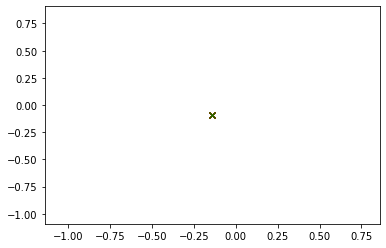

In [10]:
for xy in np.linspace(0, 1, 10):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

dx = 1
plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
plt.ylim(norm_com[1] - dx, norm_com[1] + dx)

In [14]:
def le_com_fixed(x, nbox):
    box = freud.box.Box.from_box([nbox.Lx, nbox.Ly, 0, 0, 0, 0])
    wrap = box.wrap(nbox.wrap(x))
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)
    meany = box.make_absolute(xcom)
    meany[0] = 0.0
    meany[2] = 0.0
    print(meany)

    nx = x - meany
    wrap = box.wrap(nbox.wrap(nx))
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)
    meanx = box.make_absolute(xcom)[0]
    print(meanx)

    return np.array([meanx, meany[1], 0])

In [15]:
points = np.array([[0, -0.05, 0], [0.1, 0.1, 0], [0.15, 0.15, 0], [0.2, 0.2, 0], [0.25, 0.25, 0], [0.3, 0.3, 0], [0.1, 0.3, 0], [0.0, 0.3, 0], [0.08, 0.3, 0], [-0.0, 0.3, 0]])*.5
points[:, :2] -= 0.5

[ 0.         -0.39104277  0.        ]
-0.44133157
[ 0.         -0.39104277  0.        ]
-0.44133154
[ 0.         -0.39104277  0.        ]
-0.44133157
[ 0.         -0.39104277  0.        ]
-0.44133157
[ 0.         -0.39104277  0.        ]
-0.44133157
[ 0.         -0.39104277  0.        ]
-0.4413316
[ 0.         -0.39104277  0.        ]
-0.4413316
[ 0.         -0.39104277  0.        ]
-0.44133157
[ 0.         -0.39104277  0.        ]
-0.44133154
[ 0.         -0.39104277  0.        ]
-0.44133154


(-0.8, 0.8)

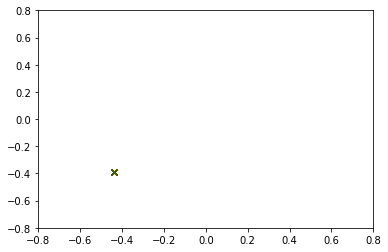

In [16]:
for xy in np.linspace(0, 1, 10):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com_fixed(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

# dx = 0.001
# plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
# plt.ylim(norm_com[1] - dx, norm_com[1] + dx);
plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)

In [ ]:
# use a dummy set of basis mass vectors

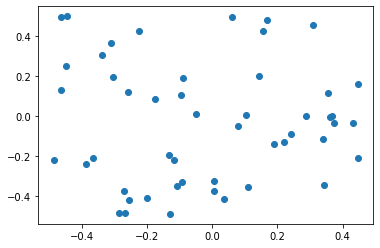

In [30]:
x = np.random.uniform(-0.5, 0.5, 50)
y = np.random.uniform(-0.5, 0.5, 50)
points = np.array([[xi, yi, 0] for xi, yi in zip(x, y)])
plt.plot(points[:, 0], points[:, 1], 'o')

In [33]:
box = freud.box.Box.from_box([1, 1, 0, 0, 0, 0])

In [36]:
def update_points_fire(points, box):
    points = box.wrap(points)
    query = freud.locality.AABBQuery(box, points)
    nlist = query.query(points, {"r_max": 0.1}).toNeighborList()
    print(len(nlist.query_point_indices))

In [37]:

update_points(points, box)

126
